# **Aprendizaje no supervisado**
# UL05. Feature Selection

## <font color='blue'>**Selección de Características**</font>

En el aprendizaje automático, la selección de características es el proceso de elegir un subconjunto de características de entrada que más contribuyen a la característica de salida para su uso en la construcción de modelos. La selección de características es sustancialmente importante si tenemos conjuntos de datos con alta dimensionalidad (es decir, una gran cantidad de características). No se prefieren los conjuntos de datos de alta dimensión porque tienen un tiempo de entrenamiento prolongado y tienen un alto riesgo de sobreajuste. La selección de características ayuda a mitigar estos problemas al seleccionar características que tienen gran importancia para el modelo, de modo que la dimensionalidad de los datos se puede reducir sin mucha pérdida de la información total. Algunos beneficios de la selección de funciones son:

  1. Reducir el tiempo de entrenamiento
  2. Reducir el riesgo de sobreajuste
  3. Aumentar potencialmente el rendimiento del modelo
  4. Reducir la complejidad del modelo para que la interpretación sea más fácil

El objetivo de este notebook es presentar lo fundamental de la selección de características en Python.

Discutiremos tres métodos claves para realizar la selección de características junto con su implementación en Python:
1. Métodos de filtrado (Filter methods)
2. Métodos de envoltura (Wrapper methods)
3. Métodos integrados (Integrated methods)

Antes de comenzar, importemos las bibliotecas de Python necesarias.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import warnings
#warnings.filterwarnings('ignore')

Haremos algunas demostraciones sobre cómo implementar cada método de selección de características en Python. Para hacer eso, usamos el conjunto de datos de flores de Iris.

In [ ]:
# Carga del dataset de Iris desde Scikit-learn
from sklearn.datasets import load_iris

# Creamos las caractarísticas (features) de entrada y salida
feature_names = load_iris().feature_names
X_data = pd.DataFrame(load_iris().data, columns=feature_names)
y_data = load_iris().target

# Veamos el dataset
X_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## <font color='blue'>**Métodos de Filtrado**</font>

En los métodos de filtrado, las características se seleccionan independientemente de cualquier algoritmo de machine learning. Los métodos de filtrado generalmente utilizan un criterio específico, como puntuaciones en pruebas estadísticas y variaciones, para clasificar la importancia de las características individuales. Los métodos de filtrado tienen algunas ventajas:
- Debido a su independencia de la selección de algoritmos de aprendizaje automático, se pueden utilizar como entrada de cualquier modelo de aprendizaje automático.
- Generalmente son efectivos en tiempo de computación.

La principal debilidad de los métodos de filtrado es que no consideran las relaciones entre características. Es por eso que se utilizan principalmente como paso previo al procesamiento de cualquier canal de selección de características. Discutiremos tres tipos de métodos de selección de filtros:
1. Valor F ANOVA (ANOVA F-value)
2. Umbral de variación (Variance Threshold)
3. Información mutua (Mutual Information)

## ANOVA F-value
El método de valor F de ANOVA estima el grado de linealidad entre la característica de entrada (es decir, el predictor) y la característica de salida. Un valor F alto indica un alto grado de linealidad y un valor F bajo indica un grado bajo de linealidad. La principal desventaja de usar el valor F de ANOVA es que solo captura las relaciones lineales entre la característica de entrada y salida. En otras palabras, el valor F no puede detectar ninguna relación no lineal.

Podemos usar Scikit-learn para calcular el valor F de ANOVA. Primero, necesitamos cargar la biblioteca. Scikit-learn tiene dos funciones para calcular el valor F:
- **f_classif**, que calcula el valor F entre la característica de entrada y salida para la tarea de clasificación.
- **f_regression**, que calcula el valor F entre la característica de entrada y salida para la tarea de regresion.

Usaremos **f_classif** porque el conjunto de datos Iris implica una tarea de clasificación.

In [ ]:
# Importamos f_classif desde Scikit-learn
from sklearn.feature_selection import f_classif

Luego, calculamos el valor F para cada característica de entrada en el conjunto de datos Iris llamando a lo siguiente:

In [ ]:
# Creamos el objeto f_classif
f_value = f_classif(X_data, y_data)

# Imprimimos nombre de atributo y F-value
for feature in zip(feature_names, f_value[0]):
    print(f'{feature[0]:17s}: {feature[1]:7.2f}')

# El resultado nos entrega la "fuerza" entre las categorías y las variables independientes.

sepal length (cm):  119.26
sepal width (cm) :   49.16
petal length (cm): 1180.16
petal width (cm) :  960.01


Visualicemos los resultados creando un gráfico de barras:


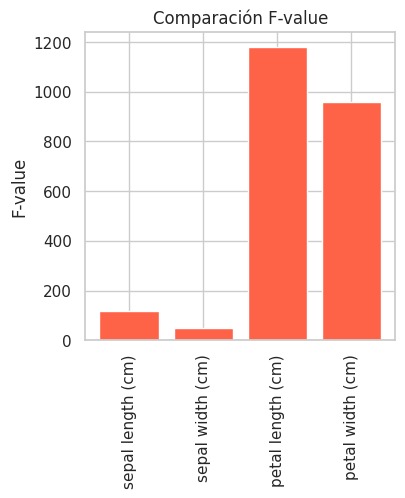

In [ ]:
# Visualizar F-values
# Los F-Value son parecidos al coef. de Pearson (éste se mueve entre -1 y 1),
# pero no se calculan de la misma forma.
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('Comparación F-value')
plt.show()

## Variance Threshold
El método de umbral de varianza elimina las características cuya varianza está por debajo de un valor de corte predefinido. Se basa en la noción de que las características que no varían mucho en sí mismas tienen un poder predictivo bajo. La principal debilidad del umbral de varianza es que no considera la relación de las características de entrada con la característica de salida.

Cabe señalar que, antes de realizar el umbral de varianza, todas las características deben estandarizarse para que tengan la misma escala.

Scikit-learn proporciona la función **VarianceThreshold** para realizar el método de umbral de varianza.

In [ ]:
# Importamos VarianceThreshold desde Scikit-learn
from sklearn.feature_selection import VarianceThreshold

Luego, realizamos el umbral de varianza. Atención que primero veremos el resultado sin estandarizar la data.

In [ ]:
# Creamos el objeto  VarianceThreshold
selector = VarianceThreshold()

# Ejecutamos umbral de varianza
# Habrá un efecto en no estandarizar los datos previamente
selector.fit_transform(X_data)

# Print the name and variance of each feature
for feature in zip(feature_names, selector.variances_):
    print(f'{feature[0]:17s}: {feature[1]:7.2g}')

sepal length (cm):    0.68
sepal width (cm) :    0.19
petal length (cm):     3.1
petal width (cm) :    0.58


Ahora la estandarizaremos antes de aplicar el filtro.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_data_tf = scaler.fit_transform(X_data)

In [ ]:
print(X_data[:3])
print(X_data_tf[:3])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]]


In [ ]:
# Creamos el objeto  VarianceThreshold
selector_std = VarianceThreshold()

# Ejecutamos umbral de varianza
# Ahora con los datos estandarizados
selector_std.fit_transform(X_data_tf)

# Print the name and variance of each feature
for feature in zip(feature_names, selector_std.variances_):
    print(f'{feature[0]:17s}: {feature[1]:7.2g}')


sepal length (cm):   0.053
sepal width (cm) :   0.033
petal length (cm):   0.089
petal width (cm) :     0.1


Visualicemos los resultados creando un gráfico de barras:

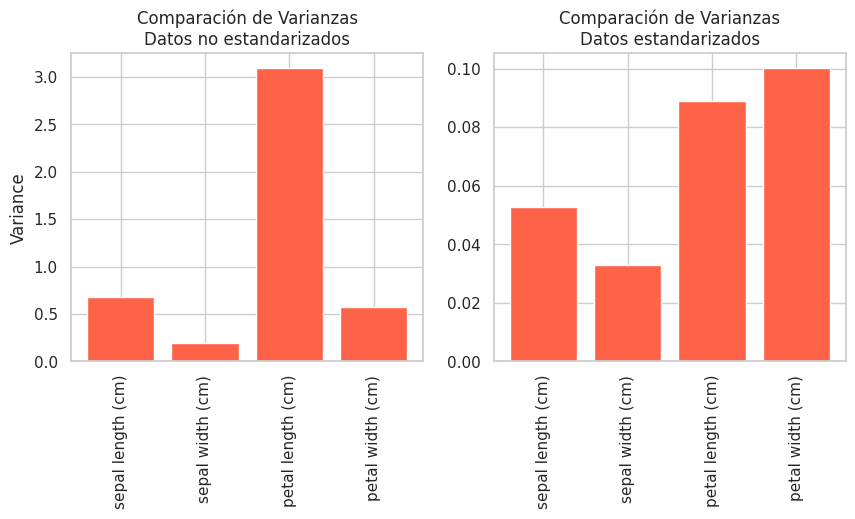

In [ ]:
# Visualizar las varianzas
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.bar(x=feature_names, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Comparación de Varianzas\nDatos no estandarizados')

plt.subplot(122)
plt.bar(x=feature_names, height=selector_std.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('')
plt.title('Comparación de Varianzas\nDatos estandarizados')

plt.show()

De forma predeterminada, **VarianceThreshold** elimina solo las características de variación cero. La característica de variación cero significa que la característica tiene el mismo valor en todos los casos. Supongamos que queremos eliminar las características que tienen una puntuación de varianza por debajo de 0.05, podemos especificar el parámetro *umbral*.

In [ ]:
# Creamos el objeto VarianceThreshold con umbral
# Con este threshold podemos hacer una selección de caractarísticas de forma automática
selector = VarianceThreshold(threshold=0.05)

# Transformamos el dataset de acuerdo con los parámetros del objeto creado
X_data_new = selector.fit_transform(X_data_tf)

# Imprimimos
print(f'Número de características antes del Umbral de Varianza: {X_data.shape[1]}')
print(f'Número de características después del Umbral de Varianza: {X_data_new.shape[1]}')

Número de características antes del Umbral de Varianza: 4
Número de características después del Umbral de Varianza: 3


Como podemos ver, **VarianceThreshold** elimina automáticamente las características que tienen una variación por debajo de 0.05. En este caso, elimina **ancho del sépalo**, que tiene una varianza de 0.033.

## Mutual Information
La información mutua (MI) mide la dependencia de una variable a otra cuantificando la cantidad de información obtenida sobre una característica, a través de la otra característica. La información mutua se calcula entre dos variables y mide la reducción de la incertidumbre para una variable dado un valor conocido de la otra variable. MI es simétrico y no negativo, y es cero si y solo si la característica de entrada y salida son independientes. Por ejemplo, si X e Y son independientes, entonces conocer X no da información sobre Y y viceversa, por lo que su información mutua es cero. A diferencia del valor F de ANOVA, la información mutua puede capturar relaciones no lineales entre la característica de entrada y salida.

Podemos usar Scikit-learn para calcular MI. Scikit-learn tiene dos funciones para calcular MI:
- **mutual_info_classif**, que calcula el IM para la tarea de clasificación
- **mutual_info_regression**, que calcula el IM para la tarea de regresión

Usaremos **mutual_info_classif** porque el conjunto de datos Iris implica una tarea de clasificación.

### Información mutua.

En la teoría de la probabilidad y la teoría de la información, la información mutua (MI) de dos variables aleatorias es una medida de la dependencia mutua entre las dos variables. Más específicamente, cuantifica la "cantidad de información" (en unidades como shannons, comúnmente llamados bits) obtenida sobre una variable aleatoria mediante la observación de la otra variable aleatoria. El concepto de información mutua está íntimamente ligado al de entropía de una variable aleatoria, una noción fundamental en la teoría de la información que cuantifica la "cantidad de información" esperada contenida en una variable aleatoria.

Sea $(X, Y)$  un par de variables aleatorias con valores sobre el espacio $\mathcal{X} \times \mathcal{Y}$. Si su distribución conjunta es $P_{(X, Y)}$ y las distribuciones marginales son $P_{X}$ , $P_{Y}$, la información mutua se define como:

$$ I(X;Y) = D_{KL}(P_{(X,Y)}||P_x \otimes P_y)$$

donde $D_{KL}$ es la divergencia de Kullback-Leibler.

En términos de Función de Masa de  Probabilidad (para variables discretas)

$$ I(X;Y) = \sum_{y\in Y}\sum_{x\in X}(P_{(X,Y)}(x,y)log(\frac{P_{(X,Y)}(x,y)}{P_X(x)P_Y(y)})$$

Este método permite manejar atributos no lineales.

In [ ]:
# Importamos mutual_info_classif desde Scikit-learn
from sklearn.feature_selection import mutual_info_classif

Luego, calculamos MI llamando a lo siguiente:

In [ ]:
# Instanciamos el objeto mutual_info_classif object para calcula el MI
MI_score = mutual_info_classif(X_data, y_data, random_state=0)

# Imprimimos
# Vemos que en este caso, la salida está normalizada
for feature in zip(feature_names, MI_score):
    print(f'{feature[0]:17s}: {feature[1]:7.2g}')

sepal length (cm):    0.47
sepal width (cm) :    0.29
petal length (cm):    0.99
petal width (cm) :    0.97


Visualicemos los resultados creando un gráfico de barras:

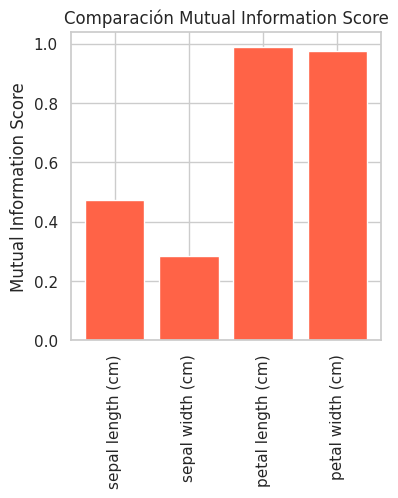

In [ ]:
# Visualizamos el mutual information
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Comparación Mutual Information Score')
plt.show()

## Uso del objeto `SelectKBest` para seleccionar funciones
Podemos usar **SelectKBest** de Scikit-learn para seleccionar características de acuerdo con las k puntuaciones más altas, determinadas por un método de filtro. Primero, necesitamos importar **SelectKBest**.

In [ ]:
# Importamos SelectKBest desde Scikit-learn
from sklearn.feature_selection import SelectKBest

**SelectKBest** tiene dos parámetros importantes:
- __score_func__: la función de filtro que se utiliza para la selección de características
- __k__: el número de funciones principales para seleccionar

Demostremos **SelectKBest** usando el valor F de ANOVA como nuestro método de filtro. Seleccionaremos las dos características principales en función del valor F de ANOVA.

In [ ]:
# Instanciamos el objeto SelectKBest
skb = SelectKBest(score_func=f_classif, # f_classif es nuestro criterio de selección de caractarísticasas
                  k=2)                  # Seleccionamos las top 2 caractarísticas (selección automática)

# Train y transform el dataset en base a SelectKBest
X_data_new = skb.fit_transform(X_data, y_data)

# Imprmimimos
print(f'Número de características antes de la selección: {X_data.shape[1]}')
print(f'Número de características después de la selección: {X_data_new.shape[1]}')

Número de características antes de la selección: 4
Número de características después de la selección: 2


Como podemos ver, **SelectKBest** elimina automáticamente dos características que tienen el valor F más bajo.

Podemos identificar el nombre de las funciones seleccionadas llamando al método **get_support**.

In [ ]:
# Imprimir el nombre de las características seleccionadas
for feature_list_index in skb.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

- petal length (cm)
- petal width (cm)


Una alternativa de **SelectKBest** es utilizar **SelectPercentile**, que selecciona funciones de acuerdo con un percentil de las puntuaciones más altas.

## <font color='green'>Actividad 1</font>
Utilice los 4 métodos para obtener las variables filtradas. Compare los resultados entrenando un modelo de regresión logística y vea los cambios.

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
# Creamos las características (features) de entrada y salida
feature_names = load_breast_cancer().feature_names
X_data_bc = pd.DataFrame(load_breast_cancer().data, columns=feature_names)
y_data_bc = load_breast_cancer().target

X_data_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X_data_bc.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
# Tu código aquí ...
# ANOVA F
# Creamos el objeto f_classif
f_value = f_classif(X_data_bc, y_data_bc)

# Imprimimos nombre de atributo y F-value
for feature in zip(feature_names, f_value[0]):
    print(f'{feature[0]:17s}: {feature[1]:7.2f}')

# El resultado nos entrega la "fuerza" entre las categorías y las variables independientes.


mean radius      :  646.98
mean texture     :  118.10
mean perimeter   :  697.24
mean area        :  573.06
mean smoothness  :   83.65
mean compactness :  313.23
mean concavity   :  533.79
mean concave points:  861.68
mean symmetry    :   69.53
mean fractal dimension:    0.09
radius error     :  268.84
texture error    :    0.04
perimeter error  :  253.90
area error       :  243.65
smoothness error :    2.56
compactness error:   53.25
concavity error  :   39.01
concave points error:  113.26
symmetry error   :    0.02
fractal dimension error:    3.47
worst radius     :  860.78
worst texture    :  149.60
worst perimeter  :  897.94
worst area       :  661.60
worst smoothness :  122.47
worst compactness:  304.34
worst concavity  :  436.69
worst concave points:  964.39
worst symmetry   :  118.86
worst fractal dimension:   66.44


Text(0, 0.5, 'F-value')

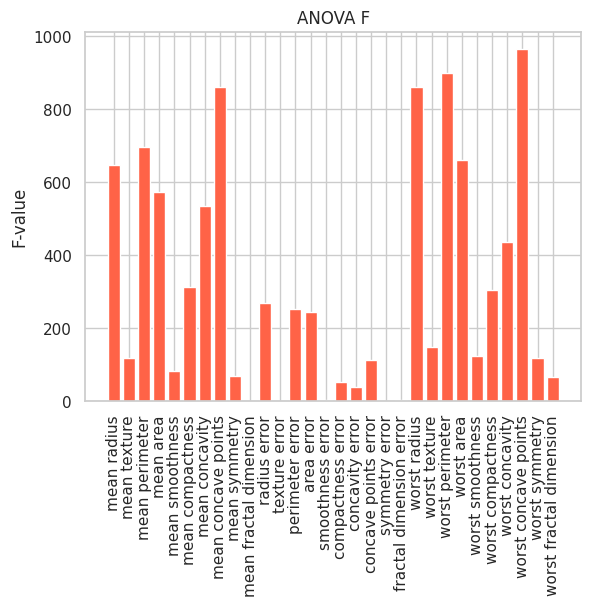

In [ ]:
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.title('ANOVA F')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')

mean radius      :   0.028
mean texture     :   0.021
mean perimeter   :   0.028
mean area        :   0.022
mean smoothness  :   0.016
mean compactness :   0.026
mean concavity   :   0.035
mean concave points:   0.037
mean symmetry    :   0.019
mean fractal dimension:   0.022
radius error     :    0.01
texture error    :   0.015
perimeter error  :  0.0091
area error       :  0.0072
smoothness error :    0.01
compactness error:   0.018
concavity error  :  0.0058
concave points error:   0.014
symmetry error   :   0.014
fractal dimension error:  0.0083
worst radius     :    0.03
worst texture    :   0.027
worst perimeter  :   0.028
worst area       :    0.02
worst smoothness :   0.023
worst compactness:   0.023
worst concavity  :   0.028
worst concave points:   0.051
worst symmetry   :   0.015
worst fractal dimension:   0.014


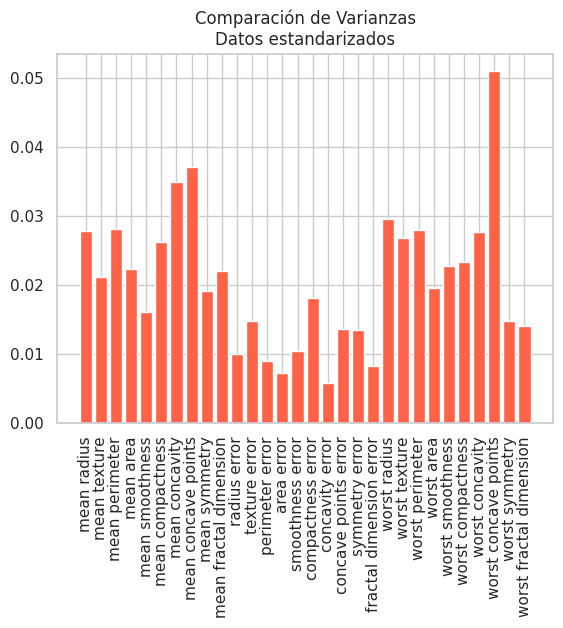

In [ ]:
# Variance Threshold
# Normalizar
scaler = MinMaxScaler()
X_data_tf = scaler.fit_transform(X_data_bc)

# Creamos el objeto  VarianceThreshold
selector = VarianceThreshold()

# Ejecutamos umbral de varianza
# Habrá un efecto en no estandarizar los datos previamente
selector.fit_transform(X_data_tf)

# Print the name and variance of each feature
for feature in zip(feature_names, selector.variances_):
    print(f'{feature[0]:17s}: {feature[1]:7.2g}')

plt.bar(x=feature_names, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('')
plt.title('Comparación de Varianzas\nDatos estandarizados')

plt.show()

mean radius      :    0.36
mean texture     :   0.095
mean perimeter   :     0.4
mean area        :    0.36
mean smoothness  :   0.076
mean compactness :    0.22
mean concavity   :    0.37
mean concave points:    0.44
mean symmetry    :   0.069
mean fractal dimension:  0.0099
radius error     :    0.25
texture error    :  0.0013
perimeter error  :    0.28
area error       :    0.34
smoothness error :   0.015
compactness error:   0.075
concavity error  :    0.11
concave points error:    0.13
symmetry error   :   0.018
fractal dimension error:   0.038
worst radius     :    0.45
worst texture    :    0.12
worst perimeter  :    0.47
worst area       :    0.46
worst smoothness :     0.1
worst compactness:    0.23
worst concavity  :    0.32
worst concave points:    0.44
worst symmetry   :    0.09
worst fractal dimension:   0.063


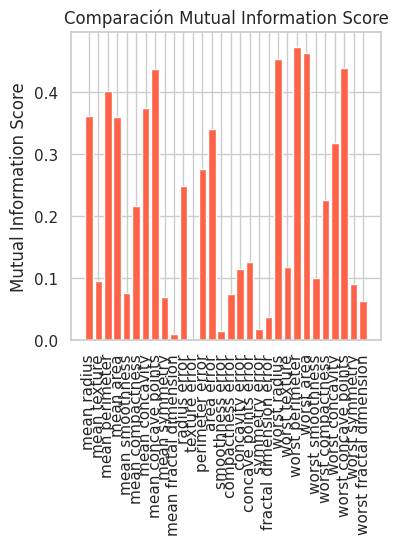

In [ ]:
#Mutual Information
MI_score = mutual_info_classif(X_data_bc, y_data_bc, random_state=0)

# Imprimimos
# Vemos que en este caso, la salida está normalizada
for feature in zip(feature_names, MI_score):
    print(f'{feature[0]:17s}: {feature[1]:7.2g}')

plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Comparación Mutual Information Score')
plt.show()

In [ ]:
skb = SelectKBest(score_func=f_classif, # f_classif es nuestro criterio de selección de caractarísticasas
                  k=2)                  # Seleccionamos las top 2 caractarísticas (selección automática)

# Train y transform el dataset en base a SelectKBest
X_data_new = skb.fit_transform(X_data_bc, y_data_bc)

# Imprmimimos
print(f'Número de características antes de la selección: {X_data_bc.shape[1]}')
print(f'Número de características después de la selección: {X_data_new.shape[1]}')

Número de características antes de la selección: 30
Número de características después de la selección: 2


<font color='green'>Fin Actividad 1</font>

## <font color='blue'>**Wrapper Methods**</font>

Los métodos de envoltura intentan encontrar un subconjunto de características que produzcan el mejor rendimiento para un modelo al entrenar, evaluar y comparar el modelo con diferentes combinaciones de características. Los métodos de envoltura permiten la detección de relaciones entre características. Sin embargo, pueden ser computacionalmente costosos, especialmente si el número de características es alto. El riesgo de sobreajuste también es alto si el número de instancias en el conjunto de datos es insuficiente.

Hay algunas diferencias entre los métodos de filtro y wrapper:
- Los métodos de filtro no incorporan un modelo de aprendizaje automático para determinar si una característica es buena o mala, mientras que los métodos wrapper  usan un modelo de aprendizaje automático y lo entrenan para decidir si es esencial o no.
- Los métodos de filtrado son mucho más rápidos en comparación con los métodos wrapper, ya que no implican el entrenamiento de los modelos. Por otro lado, los métodos wrapper son computacionalmente costosos y, en el caso de conjuntos de datos masivos, los métodos wrapper no son el método de selección de características más efectivo a considerar.
- Los métodos de filtrado pueden fallar en encontrar el mejor subconjunto de características en situaciones en las que no hay suficientes datos para modelar la correlación estadística de las características, pero los métodos wrapper siempre pueden proporcionar el mejor subconjunto de características debido a su naturaleza exhaustiva.
- El uso de funciones de los métodos wrapper en su modelo final de aprendizaje automático puede llevar a un sobreajuste, ya que los métodos wrapper ya entrenan modelos de aprendizaje automático con las características y afecta el verdadero poder del aprendizaje. Pero las características de los métodos de filtro no conducirán a un sobreajuste en la mayoría de los casos.

Discutiremos tres métodos de envoltura:
1. Selección exhaustiva de funciones (EFS - Exhaustive Feature Selection)
2. Selección secuencial hacia adelante (SFS - Sequential Forward Selection)
3. Selección secuencial hacia atrás (SBS - Sequential Backward Selection)

Cada uno se discutirá a continuación.

## Exhaustive Feature Selection (EFS)

EFS encuentra el mejor subconjunto de características evaluando todas las combinaciones de características. Supongamos que tenemos un conjunto de datos con tres características. EFS evaluará las siguientes combinaciones de funciones:
- *feature_1*
- *feature_2*
- *feature_3*
- *feature_1* y *feature_2*
- *feature_1* y *feature_3*
- *feature_2* y *feature_3*
- *feature_1*, *feature_2*, y *feature_3*

EFS selecciona un subconjunto que genera el mejor rendimiento (por ejemplo, exactitud, precisión, recuperación, etc.) del modelo que se está considerando.

`Mlxtend` proporciona la función **ExhaustiveFeatureSelector** para realizar EFS.

In [ ]:
# ATENCIÓN: ejecutar solo si la siguiente celda arroja un excepcion
#
# ModuleNotFoundError: No module named 'sklearn.externals.joblib'
#
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
# Importamos ExhaustiveFeatureSelector desde Mlxtend
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

EFS tiene cinco parámetros importantes:
- *estimator*: el clasificador que pretendemos entrenar
- *min_features*: el número mínimo de características para seleccionar
- *max_features*: el número máximo de características para seleccionar
- *scoring*: la métrica a usar para evaluar el clasificador
- *cv*: el número de validaciones cruzadas a realizar

En este ejemplo, usamos la regresión logística como nuestro clasificador / estimador.

In [ ]:
# Importamos logistic regression desde Scikit-learn
from sklearn.linear_model import LogisticRegression

Luego, realizamos EFS llamando a lo siguiente:

In [ ]:
# Creamos la instancia del clasificador logistic regression
lr = LogisticRegression(max_iter=5000)

# Creamos la instancia EFS
efs = EFS(estimator=lr,        # Utilice la regresión logística como clasificador/estimador
                               # la indicamos quien va a construir el clasificador (lr)
          min_features=1,      # Número mínimo de características a considerar: 1
          max_features=4,      # Número máximo de características a considerar: 4
          scoring='accuracy',  # Métrica a utilizar para evaluar el clasificador
          cv=5)                # Número de cross-validations a ejecutar: 2 (probar con 5 es lo habitual)

# Entrenamos EFS
# Acá pasamos el conjunto de datos de la variable dependiente (y_data) porque ejecutamos
# el modelo (lr) y calculamos la métrica. En los métodos de filtrado NO se usa el modelo (lr)
efs = efs.fit(X_data, y_data)

# Imprimimos resultados
print(f'\nMejor accuracy score: {efs.best_score_:4.2f}') # best_score_  muestra el mejor score
print(f'Mejor subset (índices): {efs.best_idx_}') # best_idx_  muestra los índices de las
                                                  # caractarísticas que entregan el mejor score
print(f'Mejor subset (nombres): {efs.best_feature_names_}') # best_feature_names_
                                                            # muestra los nombres de las caractarísticas
                                                            # que entregan el mejor score

Features: 15/15


Mejor accuracy score: 0.97
Mejor subset (índices): (0, 1, 2, 3)
Mejor subset (nombres): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


Podemos transformar el conjunto de datos en un nuevo conjunto de datos que contiene solo el subconjunto de características que genera la mejor puntuación mediante el método **transform**.

In [ ]:
# Transformamos el dataset
X_data_new = efs.transform(X_data)

# Imprimimos resultados
print(f'Número de caractarísticas antes de la transformación: {X_data.shape[1]}')
print(f'Número de caractarísticas después de la transformación: {X_data_new.shape[1]}')

Número de caractarísticas antes de la transformación: 4
Número de caractarísticas después de la transformación: 4


In [ ]:
X_data_new[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

No hay diferencia entre el conjunto de datos antes y después de la transformación porque el subconjunto que produce la mejor puntuación incluye todas las características.

Podemos ver el rendimiento de cada subconjunto de funciones llamando a **get_metric_dict**.

In [ ]:
# Veamos el desempeño de cada subconjunto de caractarísticas
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal width (cm),)",0.046932,0.036515,0.018257
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal length (cm),)",0.069612,0.05416,0.02708
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal length (cm), sepal width (cm))",0.069612,0.05416,0.02708
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal width (cm), petal width (cm))",0.032061,0.024944,0.012472
11,"(0, 1, 3)","[0.9, 0.9666666666666667, 0.9333333333333333, ...",0.946667,"(sepal length (cm), sepal width (cm), petal wi...",0.043691,0.033993,0.016997
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal length (cm),)",0.051412,0.04,0.02
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), petal length (cm))",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal length (cm), petal width (cm))",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal width (cm), petal length (cm))",0.051412,0.04,0.02
10,"(0, 1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), sepal width (cm), petal le...",0.051412,0.04,0.02


Visualicemos el rendimiento de cada subconjunto de funciones creando un gráfico de barras horizontales:

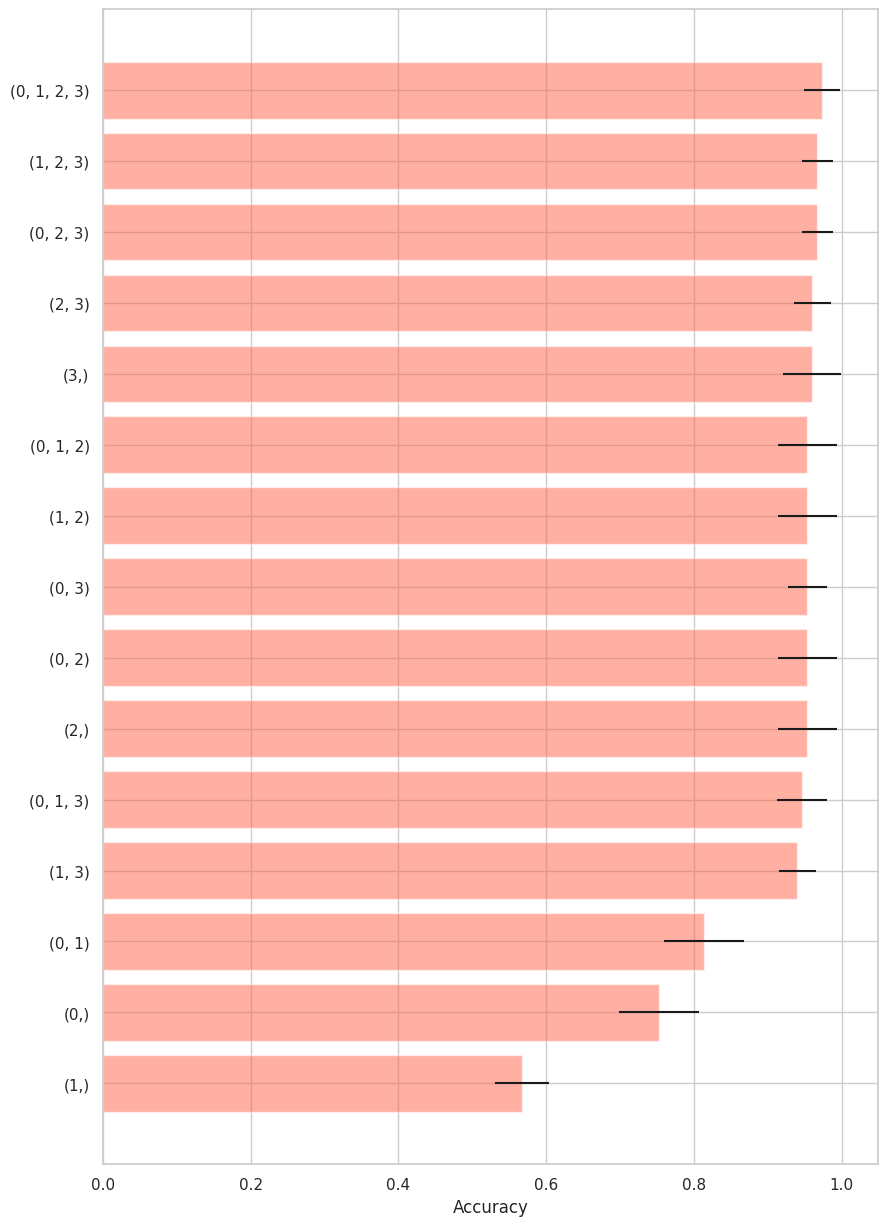

In [ ]:
# Creamos un gráfico de barras horizontales para visualizar
# el rendimiento de cada subconjunto de características
import random

fig, ax = plt.subplots(figsize=(10,15))
y_pos = range(len(efs_results))
ax.barh(y_pos,
        efs_results['avg_score'],
        xerr=efs_results['std_dev'],
        color='tomato',
        alpha=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(efs_results['feature_idx']) # si quiere ver los nombres
                                               # usar feature_names
ax.set_xlabel('Accuracy')
plt.show()

## Sequential Forward Selection (SFS)
SFS encuentra el mejor subconjunto de características agregando una característica que mejor mejora el modelo en cada iteración.

`mlxtend` proporciona la función **SequentialFeatureSelector** para realizar SFS.

In [ ]:
# Importamos SequentialFeatureSelector desde Mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

EFS tiene cinco parámetros importantes:
- *estimator*: el clasificador que pretendemos entrenar
- *k_features*: el número de funciones para seleccionar. Se puede proporcionar una tupla que contenga un valor mínimo y máximo, y el SFS considerará devolver cualquier combinación de características entre el mínimo y el máximo que obtuvo la puntuación más alta en la validez cruzada.
- *forward*: use SFS si es verdadero y use SBS si es falso
- *scoring*: la métrica a usar para evaluar el clasificador
- *cv*: el número de validaciones cruzadas a realizar

En este ejemplo, usamos la regresión logística como nuestro clasificador / estimador.

In [ ]:
# Instanciamos logistic regression classifier
lr = LogisticRegression(max_iter=5000)

# Instanciamos SFS
sfs = SFS(estimator=lr,       # Usar regresión logística como nuestra clasificadora
          k_features=(1, 4),  # Considera cualquier combinación de características entre 1 y 4
          forward=True,       # True cuando queremos ejecutar  SFS
          scoring='accuracy', # La métrica a utilizar para evaluar el clasificador
          cv=5                # Nuúmero de cross-validations a ejecutar: 5
          )

# Entranamos (train) SFS con nuestro dataset
sfs = sfs.fit(X_data, y_data)

# Imprimimos resultados
print(f'\nMejor accuracy score: {sfs.k_score_:4.2f}') # best_score_  muestra el mejor score
print(f'Mejor subset (índices): {sfs.k_feature_idx_}') # best_idx_  muestra los índices de las
                                                       # caractarísticas que entregan el mejor score
print(f'Mejor subset (nombres): {sfs.k_feature_names_}') # best_feature_names_
                                                            # muestra los nombres de las caractarísticas
                                                            # que entregan el mejor score


Mejor accuracy score: 0.97
Mejor subset (índices): (0, 1, 2, 3)
Mejor subset (nombres): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


Podemos transformar el conjunto de datos en un nuevo conjunto de datos que contiene solo el subconjunto de características que genera la mejor puntuación mediante el método **transform**.

In [ ]:
# Transformamos el dataset
X_data_new = sfs.transform(X_data)

print(f'Número de caractarísticas antes de la transformación: {X_data.shape[1]}')
print(f'Número de caractarísticas después de la transformación: {X_data_new.shape[1]}')

Número de caractarísticas antes de la transformación: 4
Número de caractarísticas después de la transformación: 4


No hay diferencia entre el conjunto de datos antes y después de la transformación porque el subconjunto que produce la mejor puntuación incluye todas las características.

Podemos ver el rendimiento de cada subconjunto de características consideradas por SFS llamando a **subsets_**.

In [ ]:
# Rendimiento de cada subconjunto de características consideradas por SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)"
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))"
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w..."
4,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.973333,"(sepal length (cm), sepal width (cm), petal le..."


Visualicemos el rendimiento de cada subconjunto de funciones creando un gráfico de barras horizontales:

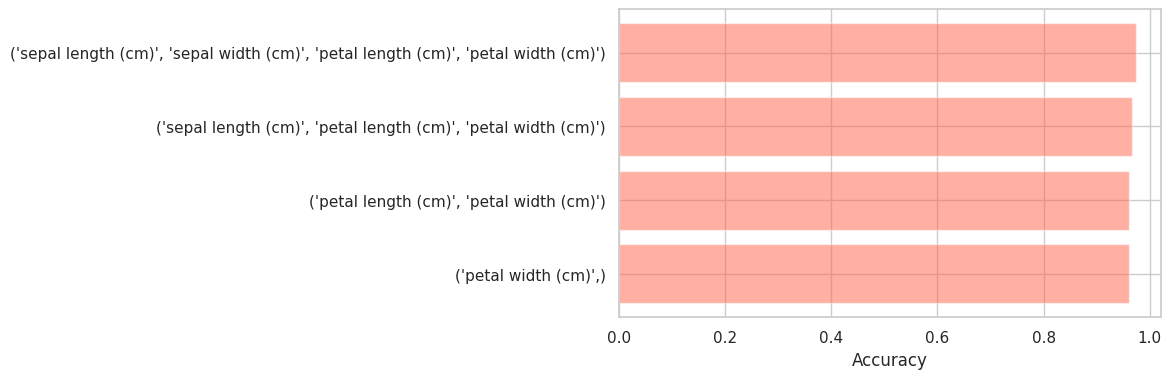

In [ ]:
# Visualizamos
fig, ax = plt.subplots(figsize=(7,4))
y_pos = range(len(sfs_results))
ax.barh(y_pos,
        sfs_results['avg_score'],
        color='tomato',
        alpha=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(sfs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

<a id='section 2.3.'></a>

## Sequential Backward Selection (SBS)
SBS es lo opuesto a SFS. SBS comienza con todas las características y elimina la característica que tiene la menor importancia para el modelo en cada iteración.

Para realizar el uso de SBS, podemos usar **SequentialFeatureSelector** de Mlxtend. Esta es la misma función que usamos para realizar SFS. La diferencia es que tenemos que establecer el parámetro *k_features* en False.

In [ ]:
# Instanciamos logistic regression classifier
lr = LogisticRegression(max_iter=5000)

# INstanciamos un SBS
sbs = SFS(estimator=lr,       # Usar regresión logística como nuestra clasificadora
          k_features=(1, 4),  # Considera cualquier combinación de características entre 1 y 4
          forward=False,      # False cuando queremos ejecutar SBS
          scoring='accuracy', # La métrica a utilizar para evaluar el clasificador
          cv=5)               # Número de cross-validations a ejecutar 5

# Entrenamos SBS con. nuestro dataset
sbs = sbs.fit(X_data.values, y_data)


# Imprimimos resultados
print(f'\nMejor accuracy score: {sfs.k_score_:4.2f}') # best_score_  muestra el mejor score
print(f'Mejor subset (índices): {sfs.k_feature_idx_}') # best_idx_  muestra los índices de las
                                                       # caractarísticas que entregan el mejor score
print(f'Mejor subset (nombres): {sfs.k_feature_names_}') # best_feature_names_
                                                         # muestra los nombres de las caractarísticas
                                                         # que entregan el mejor score


Mejor accuracy score: 0.97
Mejor subset (índices): (0, 1, 2, 3)
Mejor subset (nombres): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


Podemos transformar el conjunto de datos en un nuevo conjunto de datos que contiene solo el subconjunto de características que genera la mejor puntuación mediante el método **transform**.

In [ ]:
# Transformamos el dataset
X_data_new = sbs.transform(X_data)

print(f'Número de caractarísticas antes de la transformación: {X_data.shape[1]}')
print(f'Número de caractarísticas después de la transformación: {X_data_new.shape[1]}')

Número de caractarísticas antes de la transformación: 4
Número de caractarísticas después de la transformación: 4


In [ ]:
X_data_new[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

No hay diferencia entre el conjunto de datos antes y después de la transformación porque el subconjunto que produce la mejor puntuación incluye todas las características.

Podemos ver el rendimiento de cada subconjunto de características consideradas por SBS llamando a **subsets_**.

In [ ]:
# Rendimiento de cada subconjunto de características consideradas por SBS
sbs_results = pd.DataFrame.from_dict(sbs.subsets_).T
sbs_results

,feature_idx,cv_scores,avg_score,feature_names
4,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.973333,"(0, 1, 2, 3)"
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(0, 2, 3)"
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(2, 3)"
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(3,)"


Visualicemos el rendimiento de cada subconjunto de funciones creando un gráfico de barras horizontales:

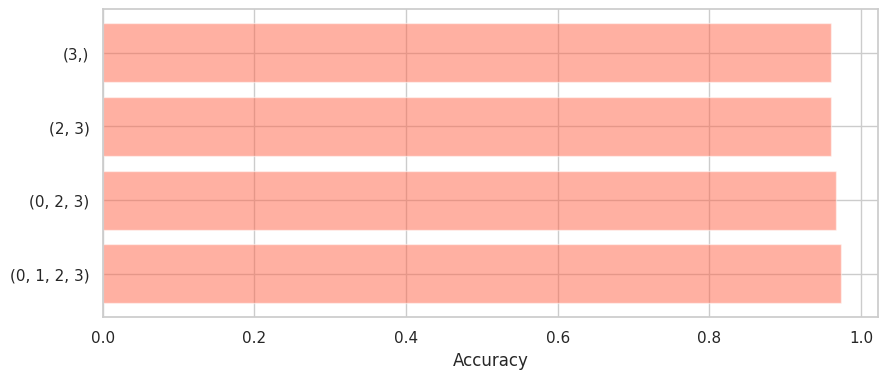

In [ ]:
# Visualizamos
fig, ax = plt.subplots(figsize=(10,4))
y_pos = np.arange(len(sbs_results))
ax.barh(y_pos,
        sbs_results['avg_score'],
        color='tomato',
        alpha=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(sbs_results['feature_idx'])
ax.set_xlabel('Accuracy')
plt.show()

Comparemos la selección generada por EFS, SFS y SBS.

In [ ]:
# Comparamos la selección generada por EFS, SFS, y SBS
print('Mejor subconjuto de EFS:', efs.best_feature_names_)
print('Mejor subconjuto de SFS:', sfs.k_feature_names_)
print('Mejor subconjuto de SBS:', sbs.k_feature_names_)

Mejor subconjuto de EFS: ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
Mejor subconjuto de SFS: ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
Mejor subconjuto de SBS: ('0', '1', '2', '3')


A diferencia del escenario simple del conjunto Iris, seleccionando la mejor combinación de características de las 4 disponibles en el dataset, terminamos con resultados similares independientemente de los algoritmos de selección que usamos. En el caso del conjunto de datos más grande y con mayor número de características, como es el de cáncer, la selección es diferente para cada algoritmo de selección.

## <font color='green'>Actividad 2</font>

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

Realice los 3 mismos procedimientos con el modelo Gaussian Naive Bayes y obtenga los subconjuntos de mejores características.

#### Método 1: Exhaustive Feature Selection(EFS)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [ ]:
# Adecuamos el dataset para poder trabajarlo directamente
feature_names = load_breast_cancer().feature_names
X_data_bc = pd.DataFrame(load_breast_cancer().data, columns=feature_names)
y_data_bc = load_breast_cancer().target

In [ ]:
# veamos los resultados del dataset
X_data_bc.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
# Importamos ExhaustiveFeatureSelector desde mlxtend
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
# también importamos el clasificador que en este caso sera Naive Bayes
from sklearn.naive_bayes import GaussianNB
# y creamos el clasificador NB
gnb = GaussianNB()

In [ ]:
# Tu código aquí ...
# EFS
# Creamos la instancia EFS
efs = EFS(estimator=gnb,

          min_features=1,      # Número mínimo de características a considerar: 1
          max_features=4,      # Número máximo de características a considerar: 4
          scoring='accuracy',  # Métrica a utilizar para evaluar el clasificador
          cv=2)                # Número de cross-validations a ejecutar: 2 (probar con 5 es lo habitual)

# Entrenamos EFS
efs = efs.fit(X_data_bc, y_data_bc)

# Imprimimos resultados
print(f'\nMejor accuracy score: {efs.best_score_:4.2f}') # best_score_  muestra el mejor score
print(f'Mejor subset (índices): {efs.best_idx_}') # best_idx_  muestra los índices de las
                                                  # caractarísticas que entregan el mejor score
print(f'Mejor subset (nombres): {efs.best_feature_names_}') # best_feature_names_
                                                            # muestra los nombres de las caractarísticas
                                                            # que entregan el mejor score


Features: 31930/31930


Mejor accuracy score: 0.97
Mejor subset (índices): (21, 23, 24, 27)
Mejor subset (nombres): ('worst texture', 'worst area', 'worst smoothness', 'worst concave points')


#### Método 2: Sequential Forward Selection(SFS)

In [ ]:
# Importa SequentialFeatureSelector desde Mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#ya tenemos el dataset dividido y nuestro clasificador

In [ ]:
# Tu código aquí ...
sfs = SFS(estimator=gnb,       # Usar regresión logística como nuestra clasificadora
          k_features=(1, 4),  # Considera cualquier combinación de características entre 1 y 4
          forward=True,      # True cuando queremos ejecutar SFS
          scoring='accuracy', # La métrica a utilizar para evaluar el clasificador
          cv=2)               # Número de cross-validations a ejecutar 5

# Entrenamos SBS con. nuestro dataset
sfs = sfs.fit(X_data_bc.values, y_data_bc)


# Imprimimos resultados
print(f'\nMejor accuracy score: {sfs.k_score_:4.2f}') # best_score_  muestra el mejor score
print(f'Mejor subset (índices): {sfs.k_feature_idx_}') # best_idx_  muestra los índices de las
                                                       # caractarísticas que entregan el mejor score
print(f'Mejor subset (nombres): {sfs.k_feature_names_}') # best_feature_names_
                                                         # muestra los nombres de las caractarísticas
                                                         # que entregan el mejor score



Mejor accuracy score: 0.96
Mejor subset (índices): (8, 21, 22, 24)
Mejor subset (nombres): ('8', '21', '22', '24')


#### Método 3: Sequential Backward Selection(SFS)

In [ ]:
# Tu código aquí ...

# INstanciamos un SBS
sbs = SFS(estimator=gnb,       # Usar regresión logística como nuestra clasificadora
          k_features=(2, 15),  # Considera cualquier combinación de características entre 1 y 4
          forward=False,      # False cuando queremos ejecutar SBS
          scoring='accuracy', # La métrica a utilizar para evaluar el clasificador
          cv=5)               # Número de cross-validations a ejecutar 5

# Entrenamos SBS con. nuestro dataset
sbs = sbs.fit(X_data_bc.values, y_data_bc)


# Imprimimos resultados
print(f'\nMejor accuracy score: {sbs.k_score_:4.2f}') # best_score_  muestra el mejor score
print(f'Mejor subset (índices): {sbs.k_feature_idx_}') # best_idx_  muestra los índices de las
                                                       # caractarísticas que entregan el mejor score
print(f'Mejor subset (nombres): {sbs.k_feature_names_}') # best_feature_names_
                                                         # muestra los nombres de las caractarísticas
                                                         # que entregan el mejor score



Mejor accuracy score: 0.98
Mejor subset (índices): (1, 7, 20, 21, 23, 27, 28)
Mejor subset (nombres): ('1', '7', '20', '21', '23', '27', '28')


<font color='green'>Fin Actividad 2</font>

## <font color='blue'>**Embedded Methods**</font>

Los métodos integrados combinan los puntos fuertes de los métodos de filtro y wrapper al aprovechar los algoritmos de machine learning que tienen su propio proceso de selección de características integrado. Integran un paso de selección de características como parte del proceso de entrenamiento (es decir, la selección de características y el proceso de entrenamiento se realizan simultáneamente). Los métodos integrados generalmente tienen un proceso más eficiente que los métodos de envoltura (wrapper) porque eliminan la necesidad de reentrenar cada subconjunto de características que se examinan. Algunos de los algoritmos de machine learning que se pueden utilizar para la selección de características son:
- Regresión LASSO
- Regresión Ridge
- Árbol de Decisión
- Random Forest
- Máquinas de Vectores Soporte (SVM)

En la proxima sección utilizaremos Random Forest para desarrollar los metodos embedded.

## Feature Selection usando Random Forest
El Random Forest (bosque aleatorio) es uno de los algoritmos de aprendizaje más populares utilizados para la selección de características en un flujo de trabajo de ciencia de datos. Como lo explicó Chris Albon:
> "... las estrategias basadas en árboles utilizadas por los bosques aleatorios se clasifican naturalmente según lo bien que mejoran la pureza del nodo. Esto significa una disminución de la impureza en todos los árboles (llamada impureza Gini). Los nodos con la mayor disminución de la impureza ocurren al comienzo de los árboles, mientras que las notas con la menor disminución de impurezas ocurren al final de los árboles. Por lo tanto, al podar árboles debajo de un nodo en particular, podemos crear un subconjunto de las características más importantes".

Para realizar la selección de características usando un clasificador de bosque aleatorio, primero importemos **RandomForestClassifier** de Scikit-learn.

In [ ]:
# Importamos RandomForestClassifier desde Scikit-learn
from sklearn.ensemble import RandomForestClassifier

Necesitamos dividir nuestro conjunto de datos en entrenamiento y prueba porque la selección de características es parte del proceso de entrenamiento.

In [ ]:
# Cargamos nuestro dataset
from sklearn.datasets import load_iris

# Creamos los datasets de entrada (input) y salida (output)
feature_names = load_iris().feature_names
X_data = pd.DataFrame(load_iris().data, columns=feature_names)
y_data = load_iris().target

# Importamos train_test_split fdesderom Scikit-learn
from sklearn.model_selection import train_test_split

# Dividimos dataset en 30% test y 70% training
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

Tenga en cuenta que usamos el coeficiente Gini ($G$) para definir la importancia de la característica. Hay otros criterios de importancia, pero solo limitamos nuestra discusión al criterio de Gini.

In [ ]:
# Instanciamos  random forest classifier
rfc = RandomForestClassifier(random_state=0,
                             criterion='gini') # Usamos índice gini para definir
                                               # la importancia de la característica

# Entrenamos el clasificador
rfc.fit(X_train, y_train)

# Imprimimos nombre y Gini index para cada caraterística
for feature in zip(feature_names, rfc.feature_importances_):
    print(f'{feature[0]:17s}: {feature[1]:5.2g}')

sepal length (cm):   0.1
sepal width (cm) : 0.024
petal length (cm):  0.48
petal width (cm) :  0.39


Si sumamos todas las puntuaciones de importancia, el resultado es 100%. Como podemos ver, **petal length** y **petal width** corresponden al 83% de la puntuación de importancia total. ¡Son claramente las características más importantes!

In [ ]:
rfc.feature_importances_.sum()

1.0

## Usando `SelectFromModel`para seleccionar caractarísticas
Podemos usar **SelectFromModel** de Scikit-learn para seleccionar características de acuerdo con un umbral de importancia de características. Primero, necesitamos importar **SelectKBest**.

In [ ]:
from sklearn.feature_selection import SelectFromModel

**SelectFromModel** tiene dos parámetros importantes:
- *estimator*: el algoritmo de aprendizaje automático que se utiliza para seleccionar funciones
- *threshold*: el valor de umbral que se utilizará para la selección de características. Los rasgos cuya importancia es mayor o igual se mantienen mientras que los demás se descartan.

Demostremos **SelectFromModel** mediante un clasificador de bosque aleatorio con importancia del indice Gini.

In [ ]:
# Instanciamos el clasificador random forest
rfc = RandomForestClassifier(random_state=123,
                             criterion='gini')

# Instanciamos SelectFromModel
sfm = SelectFromModel(estimator=rfc)

# Entrenamos el selector
sfm = sfm.fit(X_train, y_train)

# Veamos las caractarísticas más importantes
print('Características más importantes basadas en clasificador Random Forest:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

Características más importantes basadas en clasificador Random Forest:
- petal length (cm)
- petal width (cm)


Podemos transformar el conjunto de datos en un nuevo conjunto de datos que contenga solo las características más importantes mediante el método **transform**.

In [ ]:
# Transformamos el dataset
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Comparamos el número total del dataset original con el resultante
print(f'Número de caractarísticas antes de la transformación: {X_train.shape[1]}')
print(f'Número de caractarísticas después de la transformación: {X_important_train.shape[1]}')

Número de caractarísticas antes de la transformación: 4
Número de caractarísticas después de la transformación: 2


## Comparando Accuracy entre el clasificador con todas las características versus el con características limitadas.

Comparemos la precisión de un clasificador con características completas y un clasificador con características limitadas (es decir, las dos características principales más importantes basadas en un clasificador de bosque aleatorio).

In [ ]:
# Importamos accuracy_score desde Scikit-learn
from sklearn.metrics import accuracy_score

In [ ]:
# Instanciamos random forest classifier
rfc_full = RandomForestClassifier(random_state=0, criterion='gini')

# Entrenamos al clasificador utilizando un conjunto de datos con funciones completas
rfc_full.fit(X_train, y_train)

# Hacemos predicciones
pred_full = rfc_full.predict(X_test)

# Generamos accuracy score
print(f'Precisión del clasificador con características completas: {accuracy_score(y_test, pred_full):.6f}')

Precisión del clasificador con características completas: 0.977778


In [ ]:
# Creamos random forest classifier
rfc_lim = RandomForestClassifier(random_state=0, criterion='gini')

# Entrenamos al clasificador utilizando un subconjunto de características
rfc_lim.fit(X_important_train, y_train)

# Hacemos predicciones
pred_lim = rfc_lim.predict(X_important_test)

# Generamos accuracy score
print(f'Precisión del clasificador con sub conjunto de características : {accuracy_score(y_test, pred_lim):.6f}')

Precisión del clasificador con sub conjunto de características : 0.977778


Se puede ver que podemos reducir la cantidad de caracteristicas sin reducir significativamente el rendimiento del modelo.

## <font color='green'>Actividad 3</font>

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

Realice el mismo procedimiento con RandomForestClassifier, SVM y Lasso con este conjunto de datos.

In [ ]:
# Tu código aquí ...

# Creamos los datasets de entrada (input) y salida (output)
feature_names = data.feature_names
X_data = pd.DataFrame(data.data, columns=feature_names)
y_data = data.target

# Importamos train_test_split fdesderom Scikit-learn
from sklearn.model_selection import train_test_split

# Dividimos dataset en 30% test y 70% training
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

In [ ]:
# Instanciamos  random forest classifier
rfc = RandomForestClassifier(random_state=0,
                             criterion='gini') # Usamos índice gini para definir
                                               # la importancia de la característica

# Entrenamos el clasificador
rfc.fit(X_train, y_train)

# Imprimimos nombre y Gini index para cada caraterística
for feature in zip(feature_names, rfc.feature_importances_):
    print(f'{feature[0]:17s}: {feature[1]:5.2g}')

mean radius      : 0.022
mean texture     : 0.016
mean perimeter   :  0.06
mean area        : 0.038
mean smoothness  : 0.0054
mean compactness : 0.0067
mean concavity   : 0.087
mean concave points:  0.13
mean symmetry    : 0.0044
mean fractal dimension: 0.0027
radius error     : 0.028
texture error    : 0.006
perimeter error  : 0.016
area error       : 0.027
smoothness error : 0.0026
compactness error: 0.0032
concavity error  : 0.0052
concave points error: 0.0033
symmetry error   : 0.0066
fractal dimension error: 0.0043
worst radius     : 0.091
worst texture    : 0.013
worst perimeter  :  0.15
worst area       : 0.054
worst smoothness : 0.011
worst compactness: 0.017
worst concavity  : 0.035
worst concave points:  0.13
worst symmetry   : 0.0077
worst fractal dimension:  0.01


In [ ]:
# Instanciamos el clasificador random forest
rfc = RandomForestClassifier(random_state=123,
                             criterion='gini')

# Instanciamos SelectFromModel
sfm = SelectFromModel(estimator=rfc)

# Entrenamos el selector
sfm = sfm.fit(X_train, y_train)

# Veamos las caractarísticas más importantes
print('Características más importantes basadas en clasificador Random Forest:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

Características más importantes basadas en clasificador Random Forest:
- mean perimeter
- mean concavity
- mean concave points
- area error
- worst radius
- worst perimeter
- worst area
- worst concavity
- worst concave points


In [ ]:
# LASSO
# Instanciamos el modelo de regresión logística con L1 (LASSO)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=7)

# Instanciamos SelectFromModel
sfm = SelectFromModel(estimator=lasso_model)

# Entrenamos el selector
sfm.fit(X_train, y_train)

# Veamos las características más importantes
print('Características más importantes basadas en LASSO:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

Características más importantes basadas en LASSO:
- mean radius
- mean texture
- mean perimeter
- mean area
- texture error
- area error
- worst radius
- worst texture
- worst perimeter
- worst area
- worst concavity


In [ ]:
#SVM
from sklearn.svm import SVC
# Instanciamos el modelo SVM lineal
svm_model = SVC(kernel='linear', random_state=7)

# Instanciamos SelectFromModel
sfm = SelectFromModel(estimator=svm_model)

# Entrenamos el selector
sfm.fit(X_train, y_train)

# Veamos las características más importantes
print('Características más importantes basadas en SVM lineal:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

Características más importantes basadas en SVM lineal:
- mean radius
- mean concavity
- mean symmetry
- texture error
- worst radius
- worst smoothness
- worst compactness
- worst concavity
- worst concave points
- worst symmetry


<font color='green'>Fin Actividad 3</font>

# <font color='purple' style='bold' size=5>**Experimento** </font>

Realizar el mismo procedimiento con la regresión de Ridge

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

data = load_breast_cancer()
feature_names = data.feature_names
X_data = pd.DataFrame(data.data, columns=feature_names)
y_data = data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

# Instanciamos el modelo de regresión logística con L2 (Ridge)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=0)

# Instanciamos SelectFromModel
sfm = SelectFromModel(estimator=ridge_model)

# Entrenamos el selector
sfm.fit(X_train, y_train)

# Veamos las características más importantes
print('Características más importantes basadas en Ridge:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])


Características más importantes basadas en Ridge:
- mean radius
- mean concavity
- texture error
- worst radius
- worst compactness
- worst concavity
- worst concave points
- worst symmetry


<font color='purple' size=5 >**Fin experimento** </font>

<img src="https://drive.google.com/uc?export=view&id=1bqkJJ7QiIOTsp-7jm5eUtK-XYWMEq2_K" width="100" align="left" />
<br clear="left">


## <font color='blue'>**Resumen**</font>

Las técnicas de selección de características son métodos utilizados para identificar y seleccionar las características más relevantes o informativas de un conjunto de datos. El objetivo es reducir la dimensionalidad de los datos, mejorar la precisión del modelo y reducir el tiempo de entrenamiento.

Tipos de técnicas de selección de características:

1. Filtrado: Evalúa las características de forma independiente y selecciona aquellas con mayor relevancia según algún criterio de evaluación, como la correlación o la información mutua.

2. Wrapper: Utiliza un modelo predictivo (por ejemplo, regresión logística o SVM) para evaluar subconjuntos de características y seleccionar aquellas que maximizan el rendimiento del modelo.

3. Integrado (o Embedido): Incorpora la selección de características directamente en el proceso de entrenamiento del modelo, como en algunos algoritmos de aprendizaje automático.

Ventajas de las técnicas de selección de características:

1. Reducción de dimensionalidad: Permite eliminar características redundantes o irrelevantes, lo que reduce la complejidad computacional y el riesgo de sobreajuste.

2. Mejora de la precisión: Al eliminar características irrelevantes, se puede mejorar la precisión y generalización del modelo.

3. Mayor interpretación: Al reducir la cantidad de características, el modelo se vuelve más interpretable y fácil de analizar.

Desventajas de las técnicas de selección de características:

1. Pérdida de información: Si se eliminan características relevantes, se puede perder información valiosa para el modelo.

2. Costo computacional: Algunas técnicas de selección de características pueden ser computacionalmente costosas, especialmente para conjuntos de datos grandes.

Ejemplos de aplicaciones de técnicas de selección de características:

1. Análisis de texto: En el procesamiento del lenguaje natural, se pueden seleccionar las palabras más relevantes o términos clave para clasificar documentos.

2. Imagen y visión por computadora: En reconocimiento de objetos, se pueden seleccionar características de imágenes para identificar patrones distintivos.

3. Biomedicina: En análisis de datos de expresión genética, se pueden seleccionar genes relevantes para clasificar enfermedades o caracterizar fenotipos.

4. Finanzas: En el análisis de datos financieros, se pueden seleccionar características relevantes para predecir tendencias del mercado o riesgos crediticios.

En resumen, las técnicas de selección de características son fundamentales en la preparación de datos y modelado, ya que permiten mejorar la eficiencia, precisión e interpretación de los modelos de aprendizaje automático, aunque también pueden implicar cierta pérdida de información y costos computacionales. La elección de la técnica adecuada dependerá del problema específico y del conjunto de datos.